<a href="https://colab.research.google.com/github/Archit26/F21ML_Portfolio/blob/main/Achi's_Notebook_for_F21ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have worked on 4 different datasets upto certain point, but due to some reasons we have to go on another dataset.

First dataset which we have chosen was Fashion Mnist dataset.

About Fashion Mnist Dataset:

This is the extended version of MNIST dataset with pictures of various apparels and accessories. This dataset is further classified into training set which consist of 60,000 examples and a test set that consist of 10,000 examples. We are looking to create a classification Machine learning model out of this data set.

Pro: large nummber of training and testing data available Cons: Complexity and No Null value.
Link to dataset:
https://www.kaggle.com/datasets/zalando-research/fashionmnist

Each training and test example is assigned to one of the following labels:

0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt

In [ ]:
image_data = tf.keras.datasets.fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


3

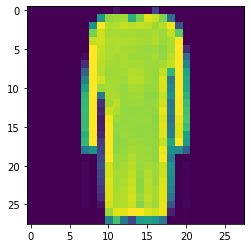

In [ ]:
(train_images, train_labels),(test_images,test_labels) = image_data.load_data()
plt.imshow(train_images[25])
train_labels[25]

After doing one lab and discussion with our tutor Marco, we have decided to go with another classification dataset which is numeric.

We have searched for a dataset and chosen Spanish wine quality dataset.
Link for that dataset: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset 
We did Lab 2 and certain part of Lab3 using this dataset.

# LAB2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Archit26/SampleDataSet/main/wines_SPA.csv")

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
df["region"].value_counts()

Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: region, Length: 76, dtype: int64

In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
wines_by_region_df = df.groupby(['region'])

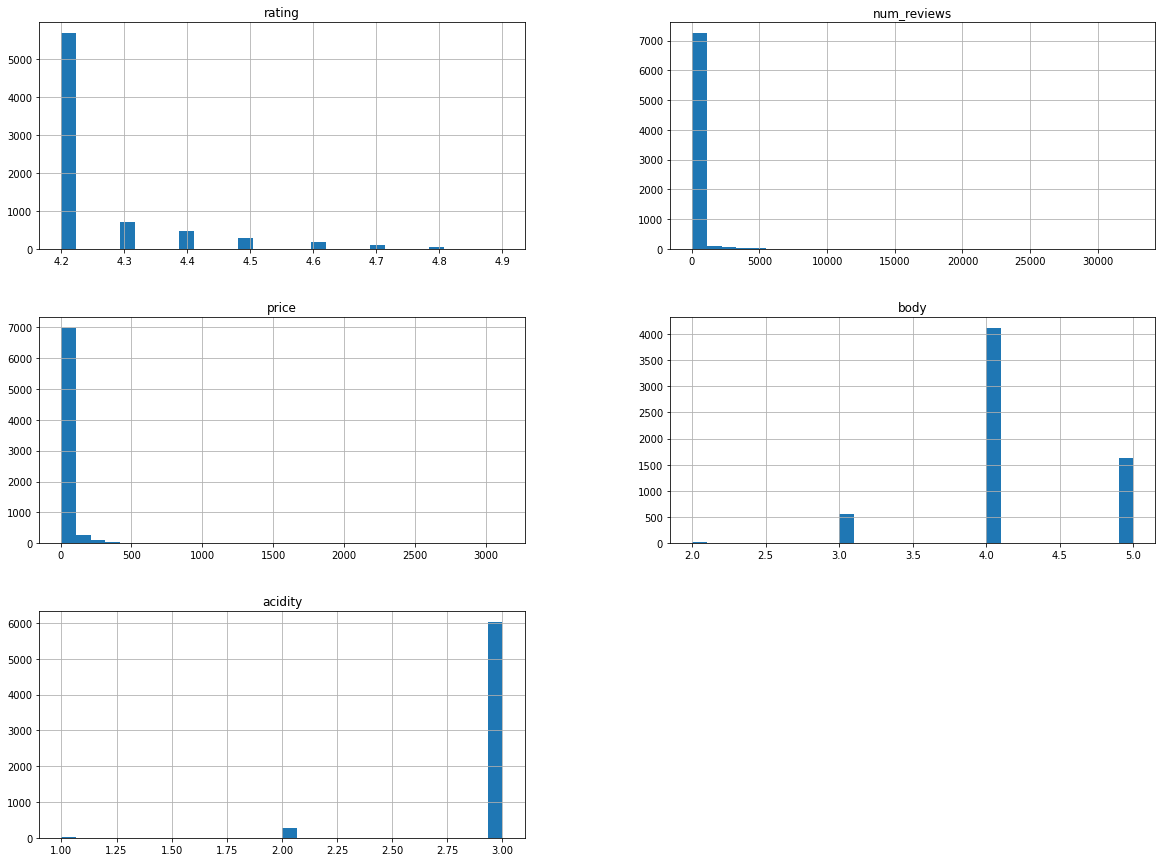

In [ ]:
#To plot a histogram for each numerical attribute
df.hist(bins=30, figsize=(20,15))
plt.show()

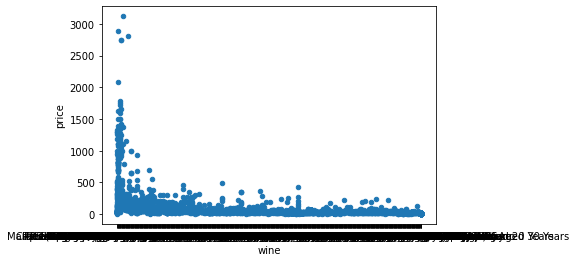

In [ ]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
df.plot(kind="scatter", x="wine", y="price")

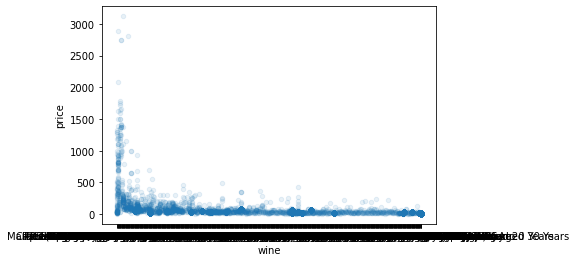

In [ ]:
df.plot(kind="scatter", x="wine", y="price",alpha=0.1)

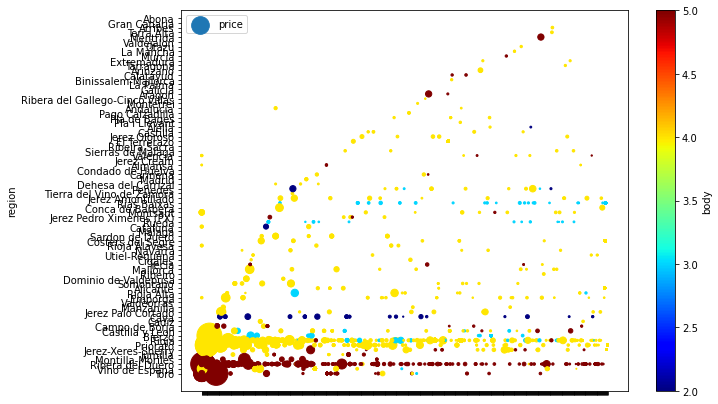

In [ ]:
df.plot(kind="scatter", x="wine", y="region",
    s=df["price"]/5, label="price", figsize=(10,7),
    c="body", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
# The radius of each circle represents the district’s population(option s) and the color represents the price (option c). 

In [ ]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [ ]:
corr_matrix["price"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373e0e1610>,
      dtype=object)

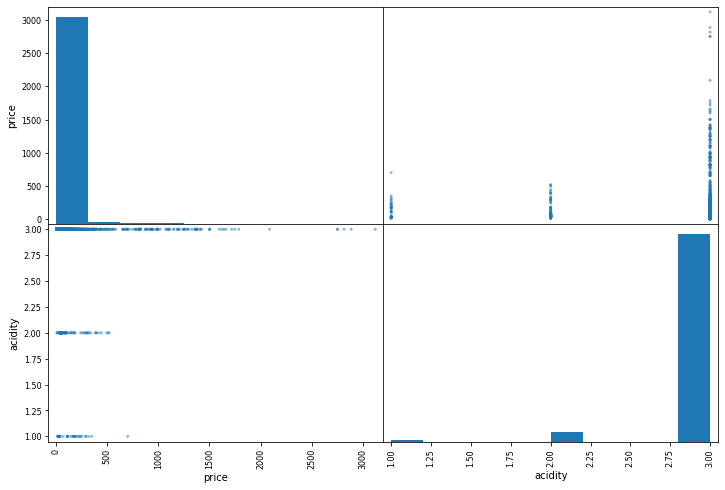

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "wine", "region",
              "acidity"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 16.0, 0.0, 550.0)

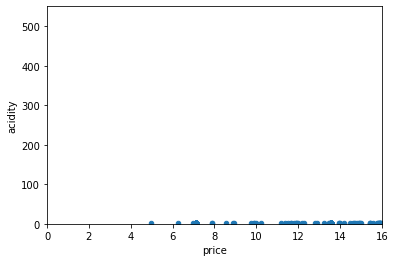

In [ ]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
df.plot(kind="scatter", x="price", y="acidity")
plt.axis([0, 16, 0, 550])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

In [ ]:
corr_matrix = df.corr()
corr_matrix["acidity"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

acidity        1.000000
num_reviews    0.040138
body          -0.017950
price         -0.032870
rating        -0.094553
Name: acidity, dtype: float64

In [ ]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new features  
#df = df.drop("total_estimated_sales", axis=1)  
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN


In [ ]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["acidity"])  
#Q12 What is displayed below? Note your observation 

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0


In [ ]:
sample_incomplete_rows.drop("acidity", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12

,winery,wine,year,rating,num_reviews,country,region,price,type,body
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN


In [ ]:
median = df["acidity"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["acidity"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13

In [ ]:
sample_incomplete_rows

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,3.0
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,3.0
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,3.0
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,3.0


In [ ]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [ ]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
dp = df.drop("wine", axis=1) 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['wine']=le.fit_transform(df['wine'])
df['winery']=le.fit_transform(df['winery'])
df['country']=le.fit_transform(df['country'])
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])
#df.head()
df.tail()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,159,619,2016,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011,4.2,389,0,57,64.50,11,5.0,3.0
7499,406,596,2016,4.2,388,0,57,31.63,11,5.0,3.0


In [ ]:
df.median().values #Check that this is the same as manually computing the median of each attribute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([285.  , 496.  ,   4.2 , 404.  ,   0.  ,  57.  ,  28.53,  12.  ,
         4.  ,   3.  ])

# LAB3

In [ ]:
features = ['winery','wine','rating','num_reviews','country', 'region', 'type', 'body', 'acidity']
X = df.loc[:, features]
y = df.loc[:, ['price']]
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309,0,57,778.06,11,5.0,3.0
5,447,778,1998,4.8,1209,0,57,490.00,11,5.0,3.0
6,447,778,2010,4.8,1201,0,57,349.00,11,5.0,3.0
7,447,778,1995,4.8,926,0,57,810.89,11,5.0,3.0
8,447,779,2015,4.8,643,0,57,345.00,11,5.0,3.0
9,447,778,2011,4.8,630,0,57,315.00,11,5.0,3.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

In [ ]:
y_test.head(10)

,price
1563,348.85
5333,37.90
7424,31.63
6731,17.90
4178,28.30
6804,28.30
3018,61.94
6317,27.89
3323,31.63
1933,19.40


In [ ]:
print(f"No. of training examples: {X_train.shape}")
print(f"No. of testing examples: {y_test.shape[0]}")

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: (5250, 9)
No. of testing examples: 2250
No. of training examples: 5250
No. of testing examples: 2250


In [ ]:
X_test.shape

(2250, 9)

In [ ]:
y_train.shape

(5250, 1)

In [ ]:
df_matrix=X_train.corr()
df_matrix

,winery,wine,rating,num_reviews,country,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,NaN,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,NaN,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,NaN,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,NaN,0.053048,-0.002607,0.057997,0.036373
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.046135,0.170212,0.050553,0.053048,NaN,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,NaN,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,NaN,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,NaN,-0.174459,-0.291161,-0.011578,1.000000


In [ ]:
df = df_matrix.drop("country", axis=1)
df.head()

,winery,wine,rating,num_reviews,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,0.053048,-0.002607,0.057997,0.036373
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr_matrix['rating'].sort_values(ascending=False)

rating         1.000000
price          0.544809
body           0.163033
num_reviews    0.015229
acidity       -0.094553
Name: rating, dtype: float64

In [ ]:
corr_matrix['price'].sort_values(ascending=False)

price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
Name: price, dtype: float64

In [ ]:
corr_matrix['acidity'].sort_values(ascending=False)

acidity        1.000000
num_reviews    0.040138
body          -0.017950
price         -0.032870
rating        -0.094553
Name: acidity, dtype: float64

In [ ]:
df1 = X_train.drop(['num_reviews','acidity'], axis=1)
df1.head()

,winery,wine,rating,country,region,type,body
5365,383,496,4.2,0,59,12,4.0
4341,317,260,4.2,0,69,19,5.0
7481,285,56,4.2,0,8,5,3.0
2731,292,639,4.2,0,54,0,3.0
1511,280,421,4.3,0,37,21,NaN


In [ ]:
df2=X_train.drop(['acidity'],axis=1)
df2.head()

,winery,wine,rating,num_reviews,country,region,type,body
5365,383,496,4.2,402,0,59,12,4.0
4341,317,260,4.2,400,0,69,19,5.0
7481,285,56,4.2,415,0,8,5,3.0
2731,292,639,4.2,414,0,54,0,3.0
1511,280,421,4.3,94,0,37,21,NaN


In [ ]:
df3 = X_train.drop(['rating'], axis=1)
df3.head()

,winery,wine,num_reviews,country,region,type,body,acidity
5365,383,496,402,0,59,12,4.0,3.0
4341,317,260,400,0,69,19,5.0,3.0
7481,285,56,415,0,8,5,3.0,3.0
2731,292,639,414,0,54,0,3.0,3.0
1511,280,421,94,0,37,21,NaN,NaN


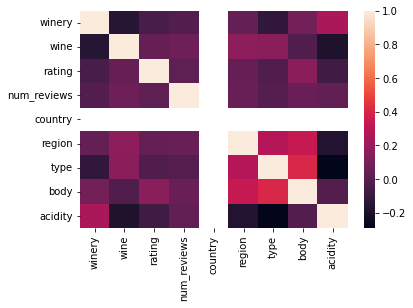

In [ ]:
##correlation map
import seaborn as sns

sns.heatmap(df_matrix)
plt.show()

In [ ]:
df_matrix.columns

Index(['winery', 'wine', 'rating', 'num_reviews', 'country', 'region', 'type',
       'body', 'acidity'],
      dtype='object')

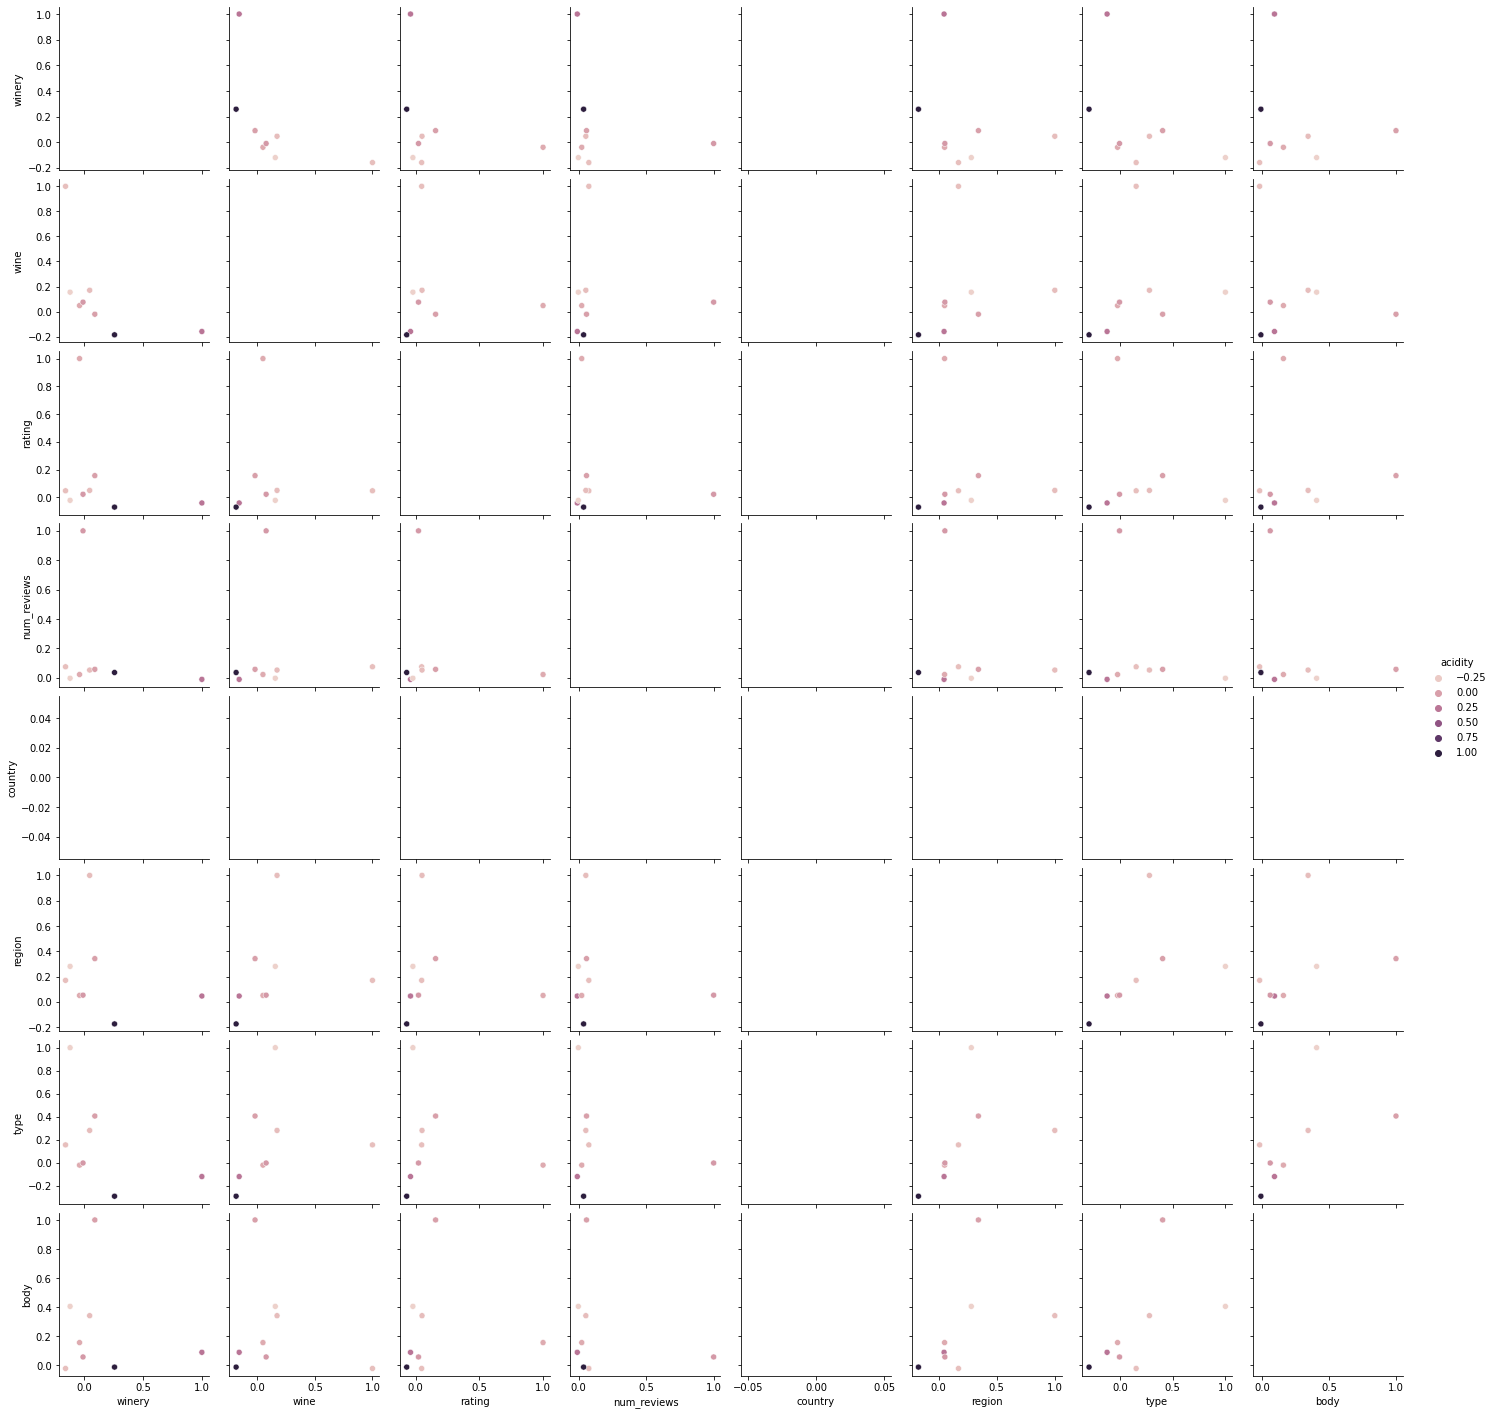

In [ ]:
sns.pairplot(df_matrix, hue="acidity")

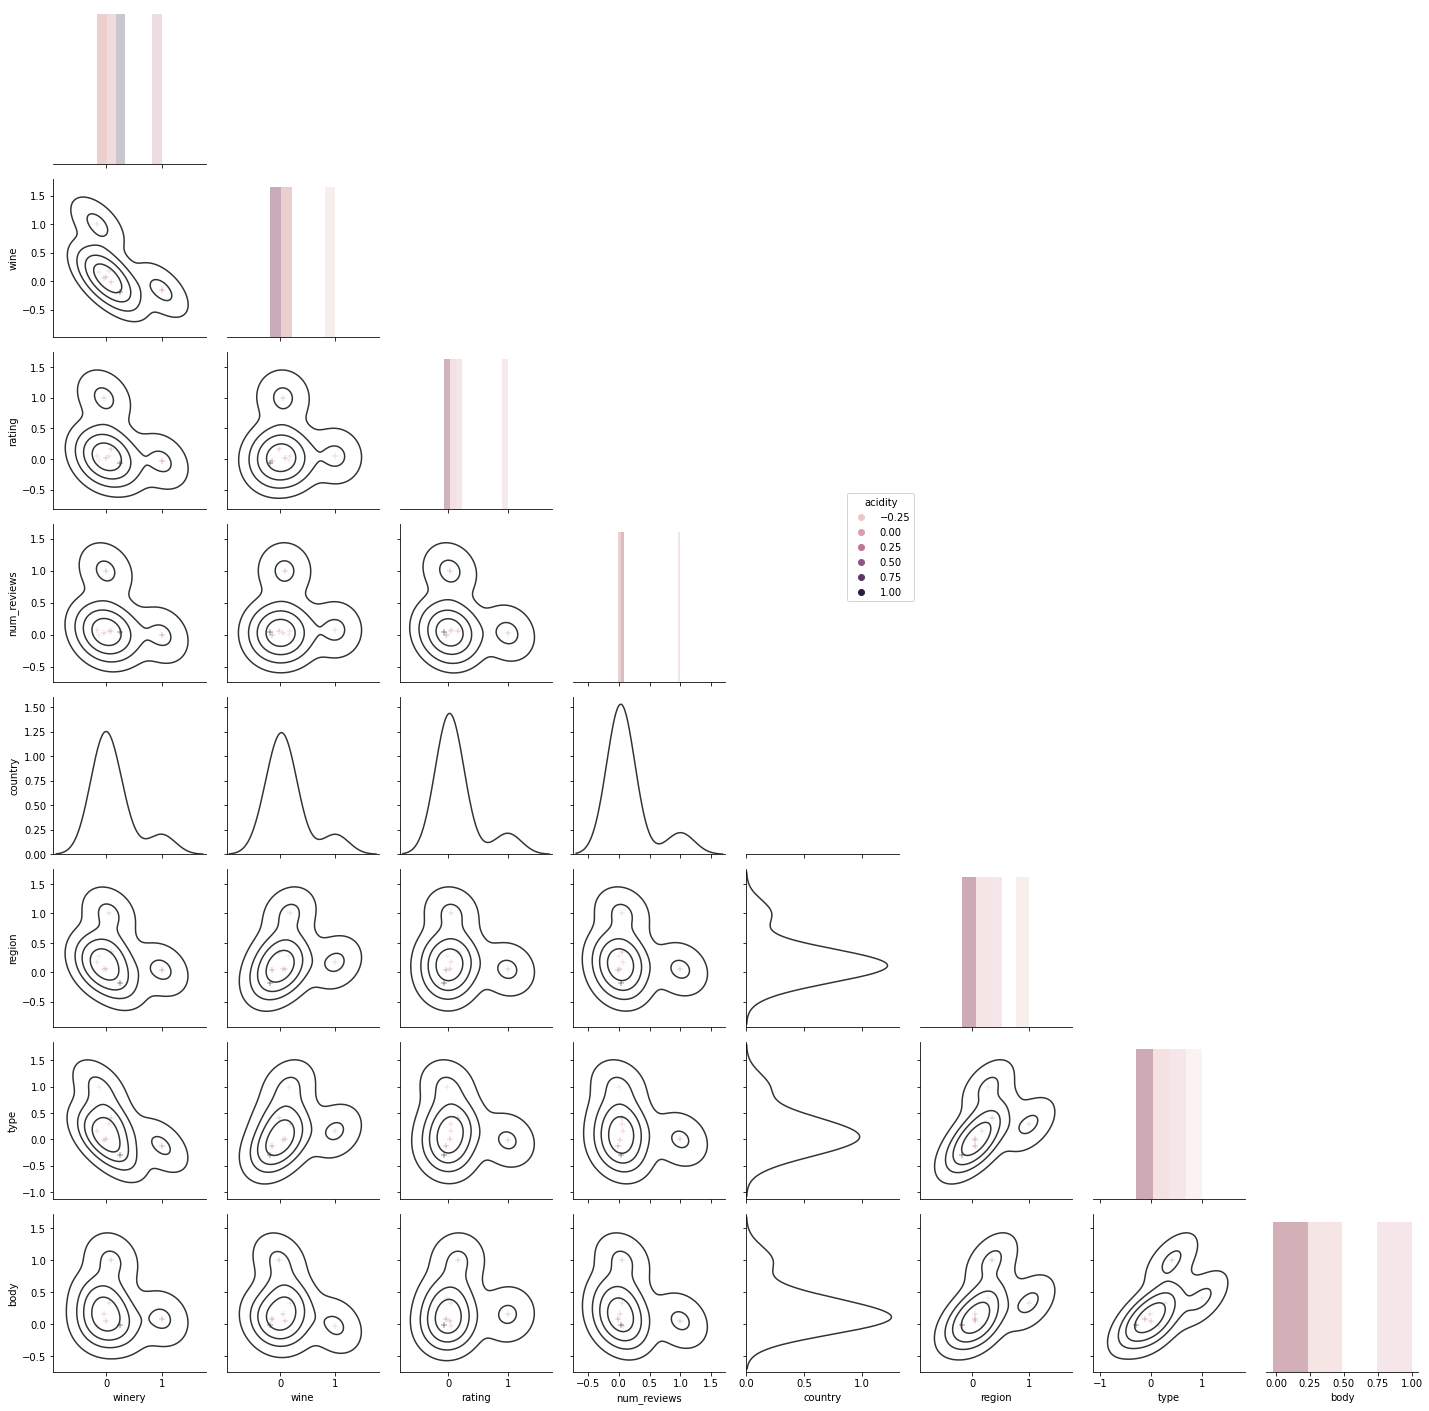

In [ ]:
g = sns.PairGrid(df_matrix, hue="acidity", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [ ]:
df_matrix.fillna(df_matrix.mean())

,winery,wine,rating,num_reviews,country,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,NaN,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,NaN,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,NaN,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,NaN,0.053048,-0.002607,0.057997,0.036373
country,0.132985,0.135271,0.143421,0.154056,NaN,0.220986,0.175743,0.252481,0.070148
region,0.046135,0.170212,0.050553,0.053048,NaN,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,NaN,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,NaN,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,NaN,-0.174459,-0.291161,-0.011578,1.000000


In [ ]:
witout_country=df_matrix.drop('country',axis=1)

In [ ]:
witout_country.drop('country',axis=0)

,winery,wine,rating,num_reviews,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,0.053048,-0.002607,0.057997,0.036373
region,0.046135,0.170212,0.050553,0.053048,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,-0.174459,-0.291161,-0.011578,1.000000


In [ ]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
#scalar.fit(witout_country)
#scaled_data = scalar.transform(witout_country)
  
# Importing PCA
from sklearn.decomposition import PCA
  

  
#x_pca.shape
x=witout_country
y=y_test
x_scaled = scalar.fit_transform(x)
x_scaled 

array([[ 2.48160379, -0.8432933 , -0.55515638, -0.51242516, -0.52966844,
        -0.79132545, -0.51114742,  0.48705639],
       [-0.83598469,  2.4773104 , -0.28964026, -0.24551367, -0.15380891,
        -0.05594959, -0.86075486, -0.66536269],
       [-0.49483272, -0.2506522 ,  2.59403176, -0.40910559, -0.51628657,
        -0.52589779, -0.30067696, -0.36374371],
       [-0.41038233, -0.17190753, -0.36539119,  2.63597175, -0.50872779,
        -0.47668376, -0.61188915, -0.08783398],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [-0.24858409,  0.10009999, -0.28123763, -0.31474113,  2.35983588,
         0.28005751,  0.2812503 , -0.63611454],
       [-0.72504705,  0.05597513, -0.49798813, -0.48816415,  0.18036129,
         2.20302512,  0.48214463, -0.93960462],
       [-0.12298448, -0.44798555,  0.04086002, -0.29932034,  0.36620091,
         0.61468668,  2.35185961, -0.21253167],
       [ 0.35621157, -0.91954695

In [ ]:
y_train.fillna(y_train.mean())

,price
5365,28.53
4341,27.89
7481,17.90
2731,16.78
1511,21.95
...,...
4931,16.78
3264,19.90
1653,13.99
2607,13.58


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: ignored

Due to many missing and null values, we decided to go with another dataset after a breif discussion with our tutor.

So, we have chosen another classification dataset, which is Brain stroke dataset and link for that:
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset 

In [ ]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LAB2

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Archit26/StrokeDataSet/main/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df_copy = pd.read_csv("https://raw.githubusercontent.com/Archit26/StrokeDataSet/main/brain_stroke.csv")

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df["Residence_type"].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [ ]:
#This method shows a statistical summary of the numerical attributes 
df.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


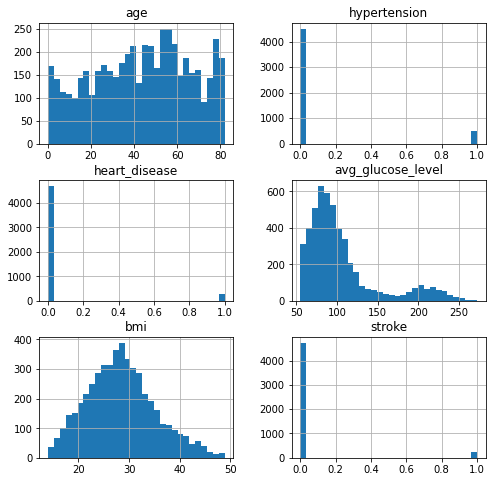

In [ ]:
#To plot a histogram for each numerical attribute
df.hist(bins=30, figsize=(8,8))
plt.show()

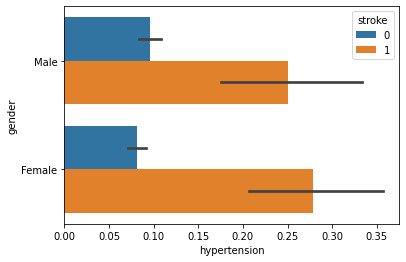

In [ ]:
sns.barplot(x='hypertension', y='gender', hue='stroke', data=df)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#Actual missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df["hypertension"].value_counts()

0    4502
1     479
Name: hypertension, dtype: int64

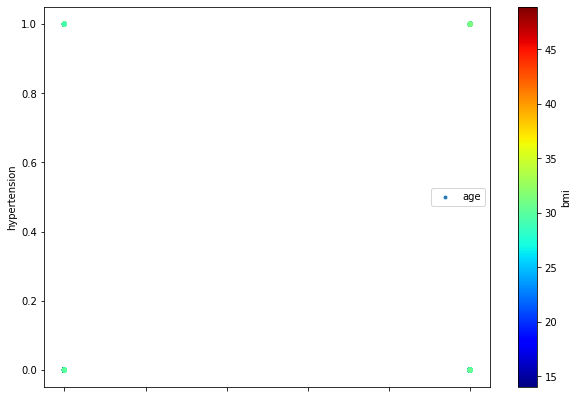

In [ ]:
df.plot(kind="scatter", x="heart_disease", y="hypertension",
    s=df["age"]/5, label="age", figsize=(10,7),
    c="bmi", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
# The radius of each circle represents the district’s population(option s) and the color represents the price (option c). 

In [ ]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [ ]:
corr_matrix["age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

age                  1.000000
bmi                  0.373703
hypertension         0.278120
heart_disease        0.264852
stroke               0.246478
avg_glucose_level    0.236763
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f373732efd0>,
      dtype=object)

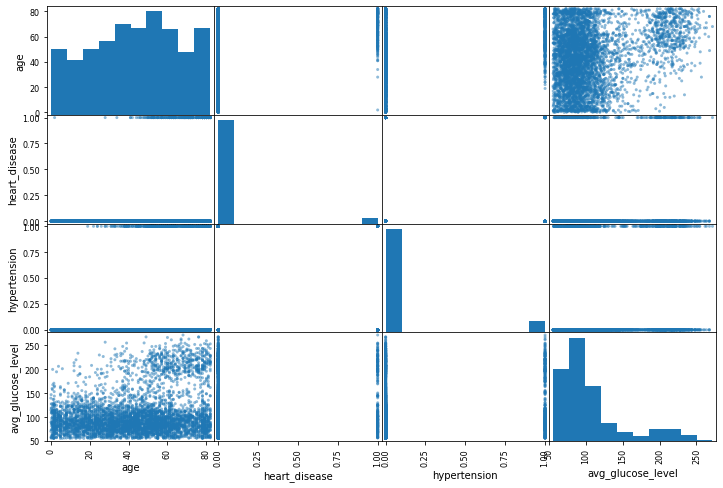

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["age", "heart_disease", "hypertension",
              "avg_glucose_level"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 16.0, 0.0, 5500.0)

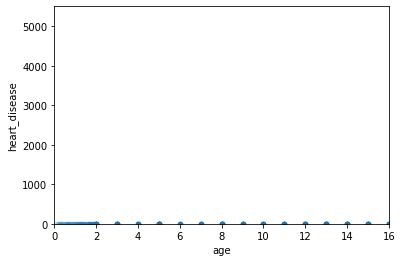

In [ ]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
df.plot(kind="scatter", x="age", y="heart_disease",
             alpha=0.1)
plt.axis([0, 16, 0, 5500])

In [ ]:
corr_matrix["age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

age                  1.000000
bmi                  0.373703
hypertension         0.278120
heart_disease        0.264852
stroke               0.246478
avg_glucose_level    0.236763
Name: age, dtype: float64

In [ ]:
df.median().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([45.  ,  0.  ,  0.  , 91.85, 28.1 ,  0.  ])

# LAB3

In [ ]:
#converting non-numerical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])
df.head()
#df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,0,1
1,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,0,49.0,0,0,1,1,1,171.23,34.4,2,1
3,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,1,81.0,0,0,1,1,1,186.21,29.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [ ]:
df.median().values

array([ 0.  , 45.  ,  0.  ,  0.  ,  1.  ,  1.  ,  1.  , 91.85, 28.1 ,
        1.  ,  0.  ])

In [ ]:
features = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']
X = df.loc[:, features]
y = df.loc[:, ['stroke']]
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,0,1
1,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,0,49.0,0,0,1,1,1,171.23,34.4,2,1
3,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,1,81.0,0,0,1,1,1,186.21,29.0,0,1
5,1,74.0,1,1,1,1,0,70.09,27.4,1,1
6,0,69.0,0,0,0,1,1,94.39,22.8,1,1
7,0,78.0,0,0,1,1,1,58.57,24.2,3,1
8,0,81.0,1,0,1,1,0,80.43,29.7,1,1
9,0,61.0,0,1,1,0,0,120.46,36.8,2,1


In [ ]:
features_copy = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']
X_copy = df.loc[:, features_copy]
y_copy = df.loc[:, ['stroke']]
df_copy.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

In [ ]:
X_copy_train, X_copy_test, y_copy_train, y_copy_test = train_test_split(X_copy, y_copy, random_state=0, train_size = .70)

In [ ]:
print(f"No. of training examples: {X_train.shape}")
print(f"No. of testing examples: {y_test.shape[0]}")

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: (3486, 10)
No. of testing examples: 1495
No. of training examples: 3486
No. of testing examples: 1495


In [ ]:
X_test.shape

(1495, 10)

In [ ]:
y_train.shape

(3486, 1)

In [ ]:
df_matrix=X_train.corr()
df_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
gender,1.000000,-0.029314,0.027127,0.089026,-0.042997,0.071196,0.006263,0.061445,-0.007914,0.035055
age,-0.029314,1.000000,0.293805,0.274090,0.682112,-0.415243,0.025425,0.236472,0.365528,-0.375859
hypertension,0.027127,0.293805,1.000000,0.133367,0.165153,-0.052689,0.006642,0.176253,0.142521,-0.138390
heart_disease,0.089026,0.274090,0.133367,1.000000,0.119855,-0.041528,0.016805,0.160036,0.059582,-0.072343
ever_married,-0.042997,0.682112,0.165153,0.119855,1.000000,-0.411044,0.008178,0.158683,0.366322,-0.304075
work_type,0.071196,-0.415243,-0.052689,-0.041528,-0.411044,1.000000,-0.007230,-0.057577,-0.381428,0.322384
Residence_type,0.006263,0.025425,0.006642,0.016805,0.008178,-0.007230,1.000000,0.006498,0.021351,0.005482
avg_glucose_level,0.061445,0.236472,0.176253,0.160036,0.158683,-0.057577,0.006498,1.000000,0.180288,-0.097996
bmi,-0.007914,0.365528,0.142521,0.059582,0.366322,-0.381428,0.021351,0.180288,1.000000,-0.244451
smoking_status,0.035055,-0.375859,-0.138390,-0.072343,-0.304075,0.322384,0.005482,-0.097996,-0.244451,1.000000


In [ ]:
df_matrix['hypertension'].sort_values(ascending=False)

hypertension         1.000000
age                  0.293805
avg_glucose_level    0.176253
ever_married         0.165153
bmi                  0.142521
heart_disease        0.133367
gender               0.027127
Residence_type       0.006642
work_type           -0.052689
smoking_status      -0.138390
Name: hypertension, dtype: float64

In [ ]:
df_matrix['heart_disease'].sort_values(ascending=False)

heart_disease        1.000000
age                  0.274090
avg_glucose_level    0.160036
hypertension         0.133367
ever_married         0.119855
gender               0.089026
bmi                  0.059582
Residence_type       0.016805
work_type           -0.041528
smoking_status      -0.072343
Name: heart_disease, dtype: float64

In [ ]:
df_matrix['smoking_status'].sort_values(ascending=False)

smoking_status       1.000000
work_type            0.322384
gender               0.035055
Residence_type       0.005482
heart_disease       -0.072343
avg_glucose_level   -0.097996
hypertension        -0.138390
bmi                 -0.244451
ever_married        -0.304075
age                 -0.375859
Name: smoking_status, dtype: float64

In [ ]:
df1=X_train.drop(['Residence_type','work_type'], axis=1)
df1.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
1692,1,64.0,0,0,1,187.87,32.3,1
4380,0,32.0,0,0,1,102.87,26.6,2
2066,1,39.0,0,0,1,88.48,34.3,1
2240,0,58.0,0,0,1,65.66,24.6,0
2526,0,67.0,0,1,1,94.45,29.6,0


In [ ]:
df2=X_train.drop(['Residence_type','work_type'], axis=1)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
1692,1,64.0,0,0,1,187.87,32.3,1
4380,0,32.0,0,0,1,102.87,26.6,2
2066,1,39.0,0,0,1,88.48,34.3,1
2240,0,58.0,0,0,1,65.66,24.6,0
2526,0,67.0,0,1,1,94.45,29.6,0


In [ ]:
df3=X_train.drop(['Residence_type','gender','work_type'], axis=1)
df3.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
1692,64.0,0,0,1,187.87,32.3,1
4380,32.0,0,0,1,102.87,26.6,2
2066,39.0,0,0,1,88.48,34.3,1
2240,58.0,0,0,1,65.66,24.6,0
2526,67.0,0,1,1,94.45,29.6,0


In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1692,1,64.0,0,0,1,0,0,187.87,32.3,1
4380,0,32.0,0,0,1,1,0,102.87,26.6,2
2066,1,39.0,0,0,1,2,0,88.48,34.3,1
2240,0,58.0,0,0,1,1,0,65.66,24.6,0
2526,0,67.0,0,1,1,2,0,94.45,29.6,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_copy_train = sc.fit_transform(X_copy_train)
X_copy_test = sc.transform(X_copy_test)

In [ ]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
classifer.fit(X_copy_train,y_copy_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifer.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_copy_pred = classifer.predict(X_copy_test)
y_copy_pred

array([0, 1, 0, ..., 0, 0, 0])

# LAB4

In [ ]:
# importing the accuracy score
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_pred,y_test)

0.9123745819397994

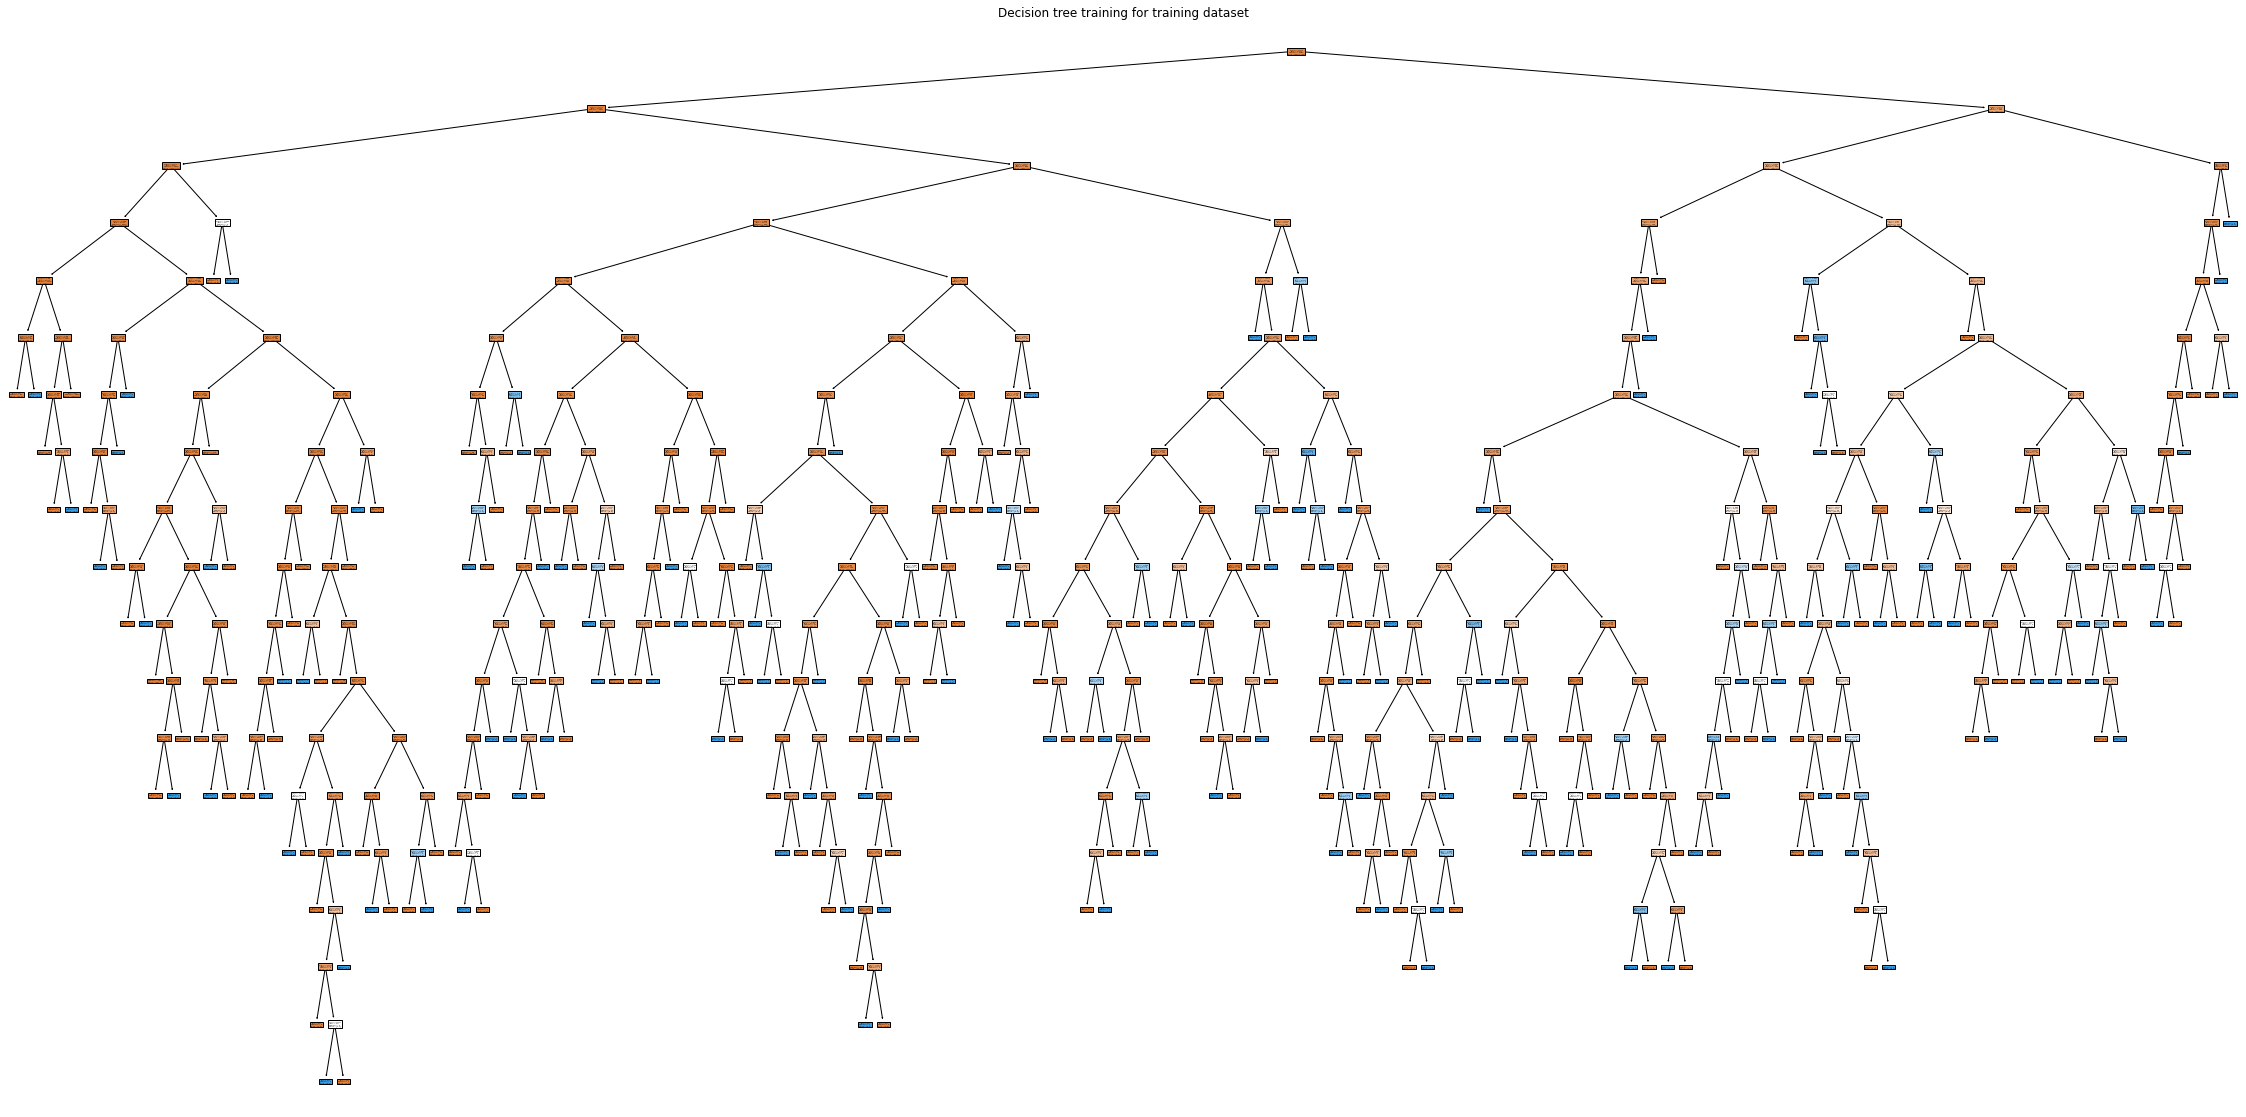

In [ ]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

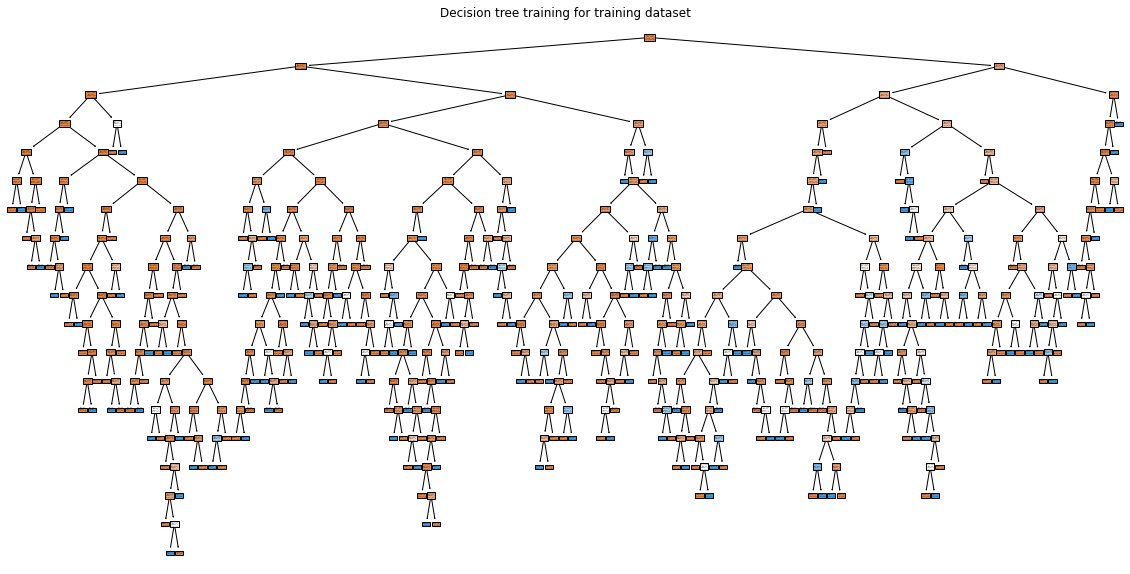

In [ ]:
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(20,10))

# providing the training dataset
clf = clf.fit(X_copy_train, y_copy_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

We have to choose another dataset, as we got this suggetion from our tutor. So we have decided another dataset, Germen Credit Risk.

Link for that, https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk

In [ ]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Archit26/RiskAnalysis/main/german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.dtypes.value_counts()

object    6
int64     5
dtype: int64

In [ ]:
# First let's to checkout the missing values do we have on this dataframe and the we can decide to clean up (remove) them,
# or leave them !!!
missing_values = data.isnull().sum() # get the number of missing data points per column.
missing_values[:] # look at the whole missing points at all columns

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
# This time we do need to know the percentage %  of the mssing values in the dataset!!!

total_cells = np.product(data.shape) # returns the product of array elements over a given axis.
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.245454545454545


In [ ]:
# it seems like we do not have that huge amout of missing values , but now we want to remove ,
# Some columns like (bmi) cuz it contains some NAN"S and that is going to affect the ML model work when it comes to predictions.

data.drop(['Unnamed: 0'],axis=1, inplace=True) #Remove rows or columns by specifying label names and corresponding axis,
# or by specifying directly index or column names.

In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
data.describe(include='object') # here by adding this argument (include='object') it allows us to look across the object(string) value

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [ ]:
data1=data.dropna()

In [ ]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [ ]:
data1.shape

(522, 10)

In [ ]:
data_uniques = data1.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
data_uniques

Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [ ]:
binary_vals = list(data_uniques[data_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
binary_vals

['Sex', 'Risk']

In [ ]:
data1[binary_vals].dtypes # Check the datatypes in case if it needs to be encoded (converted into numaric values^_^)

Sex     object
Risk    object
dtype: object

In [ ]:
categorical_vals  = list(data_uniques[(data_uniques > 2) & (data_uniques <=6)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Job', 'Housing', 'Saving accounts', 'Checking account']

In [ ]:
[[i, list(data1[i].unique())] for i in categorical_vals] 

[['Job', [2, 3, 1, 0]],
 ['Housing', ['own', 'free', 'rent']],
 ['Saving accounts', ['little', 'moderate', 'quite rich', 'rich']],
 ['Checking account', ['moderate', 'little', 'rich']]]

In [ ]:
numaric_vals = list(set(data1.columns) - set(categorical_vals)- set(binary_vals))
# Extending the numaric values among cate_vals, dataframe columns and bin_values
numaric_vals

['Duration', 'Age', 'Credit amount', 'Purpose']

In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [ ]:
lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

In [ ]:
for col in categorical_vals: 
  data1[col] = le.fit_transform(data1[col])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for col in binary_vals:
  data1[col] = lb.fit_transform(data1[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,radio/TV,0
3,45,1,2,0,0,0,7882,42,furniture/equipment,1
4,53,1,2,0,0,0,4870,24,car,0
7,35,1,3,2,0,1,6948,36,car,1
9,28,1,3,1,0,1,5234,30,car,0


In [ ]:
data1.Risk.value_counts() 

1    291
0    231
Name: Risk, dtype: int64

In [ ]:
data1.drop(['Purpose'],axis=1, inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
1,22,0,2,1,0,1,5951,48,0
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,0


(array([231.,   0.,   0.,   0., 291.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

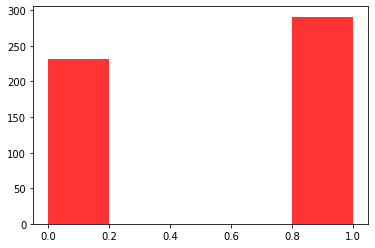

In [ ]:
# create a histogram: 

ax = plt.axes()
ax.hist(data1.Risk, bins=5, alpha=0.8, color='red')

In [ ]:
# Create Feature columns :
features_col = [x for x in data1.columns if x not in 'Risk']
features_col

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration']

In [ ]:
data1[features_col]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
1,22,0,2,1,0,1,5951,48
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
7,35,1,3,2,0,1,6948,36
9,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24
993,30,1,3,1,0,0,3959,36
996,40,1,3,1,0,0,3857,30
998,23,1,2,0,0,0,1845,45


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1[features_col], data1['Risk'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
# Creating the model 
tree_model = DecisionTreeClassifier(random_state=12)

In [ ]:
# giving data to model
tree_model = tree_model.fit(x_train, y_train)

In [ ]:
# Determine the number of nodes and maximum depth:
tree_model.tree_.node_count, tree_model.tree_.max_depth

(227, 16)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)

In [ ]:
y_train_pred = tree_model.predict(x_train)

In [ ]:
y_test_pred = tree_model.predict(x_test)

In [ ]:
full_error_scores = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred,'test')],axis=1)

In [ ]:
full_error_scores

,train,test
accuracy,1.0,0.618321
precision,1.0,0.718310
recall,1.0,0.629630
f1,1.0,0.671053


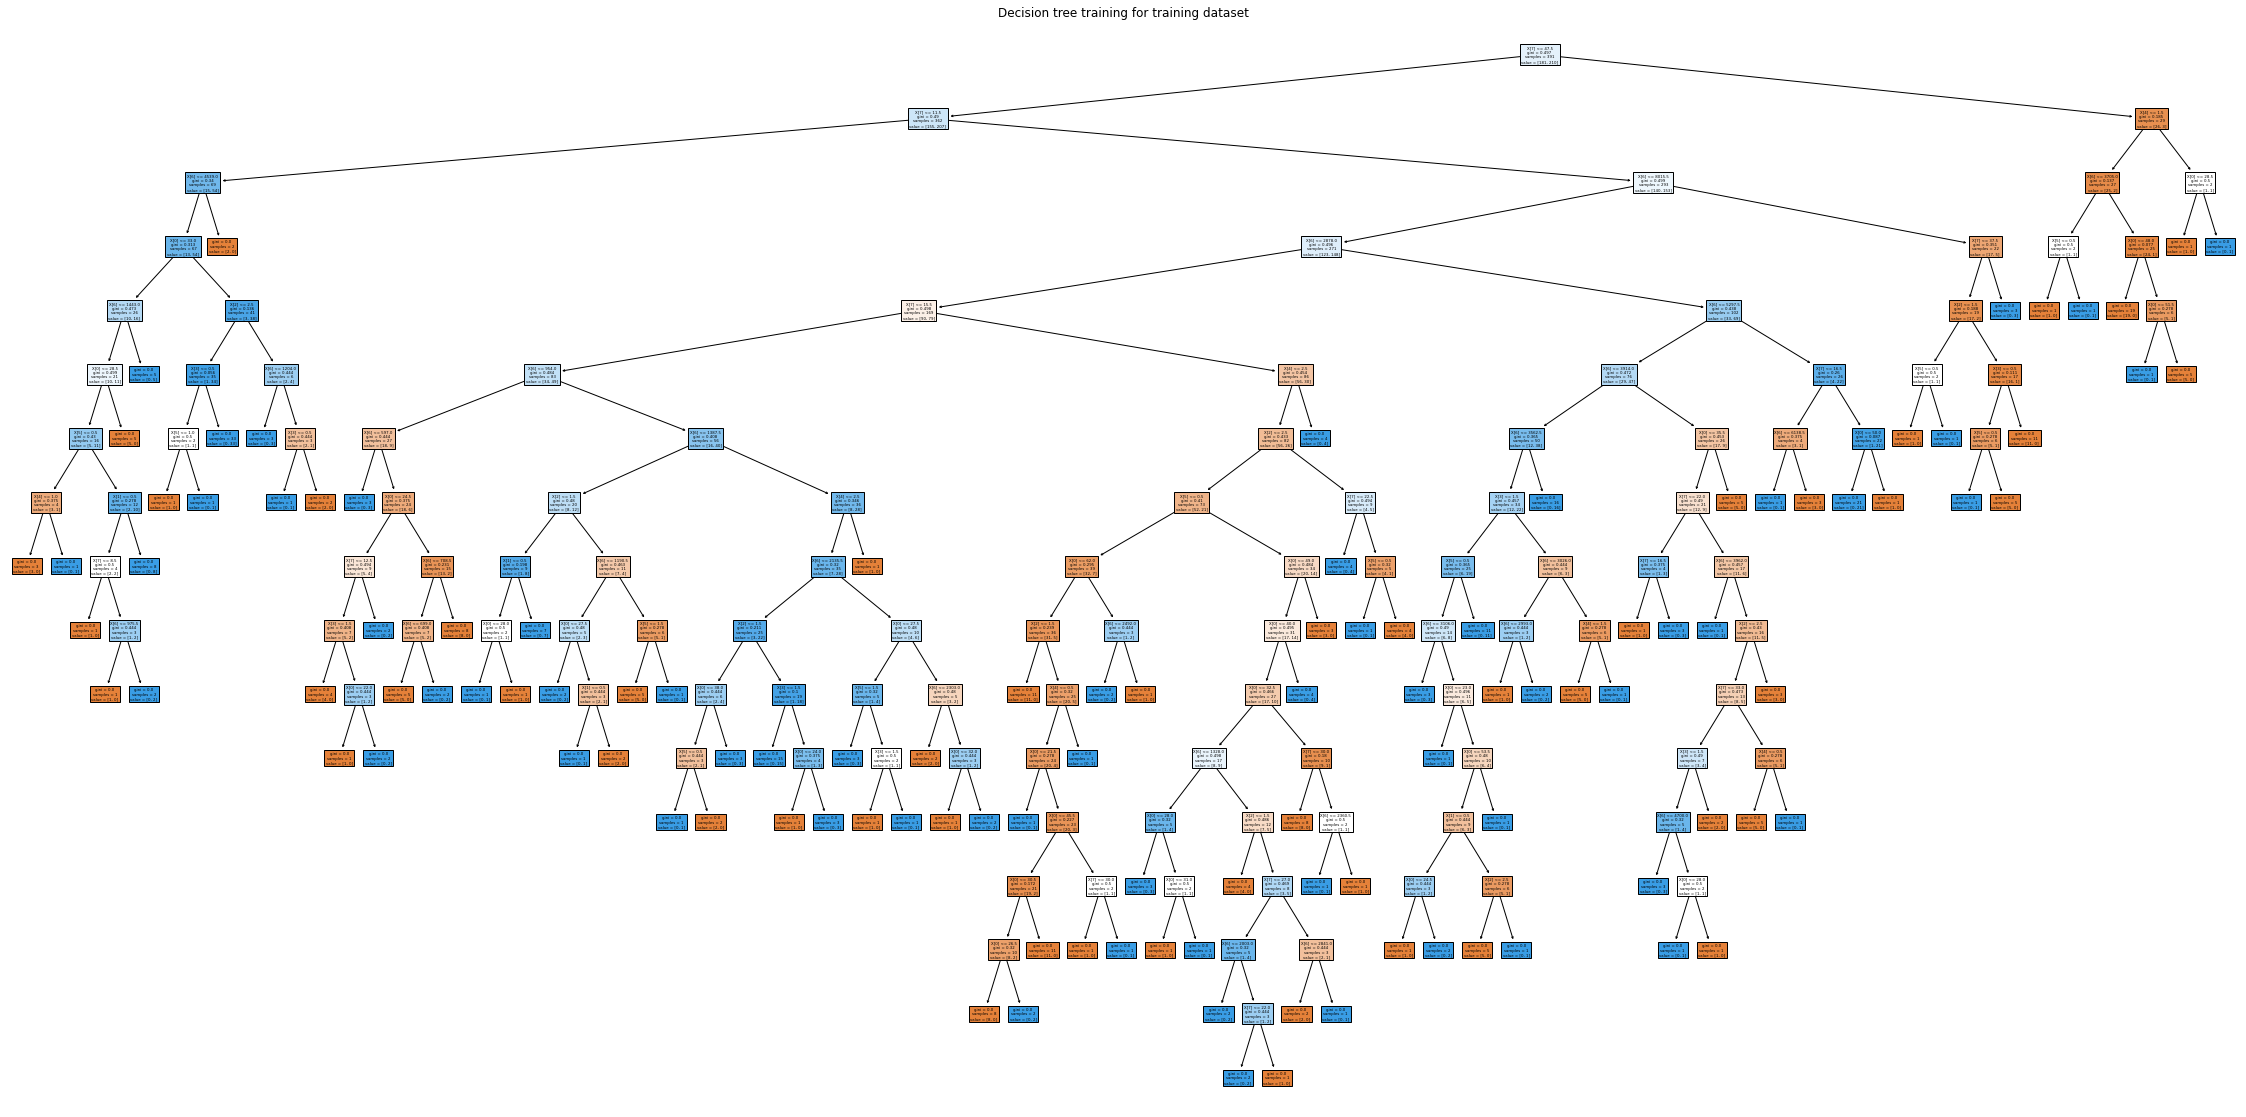

In [ ]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

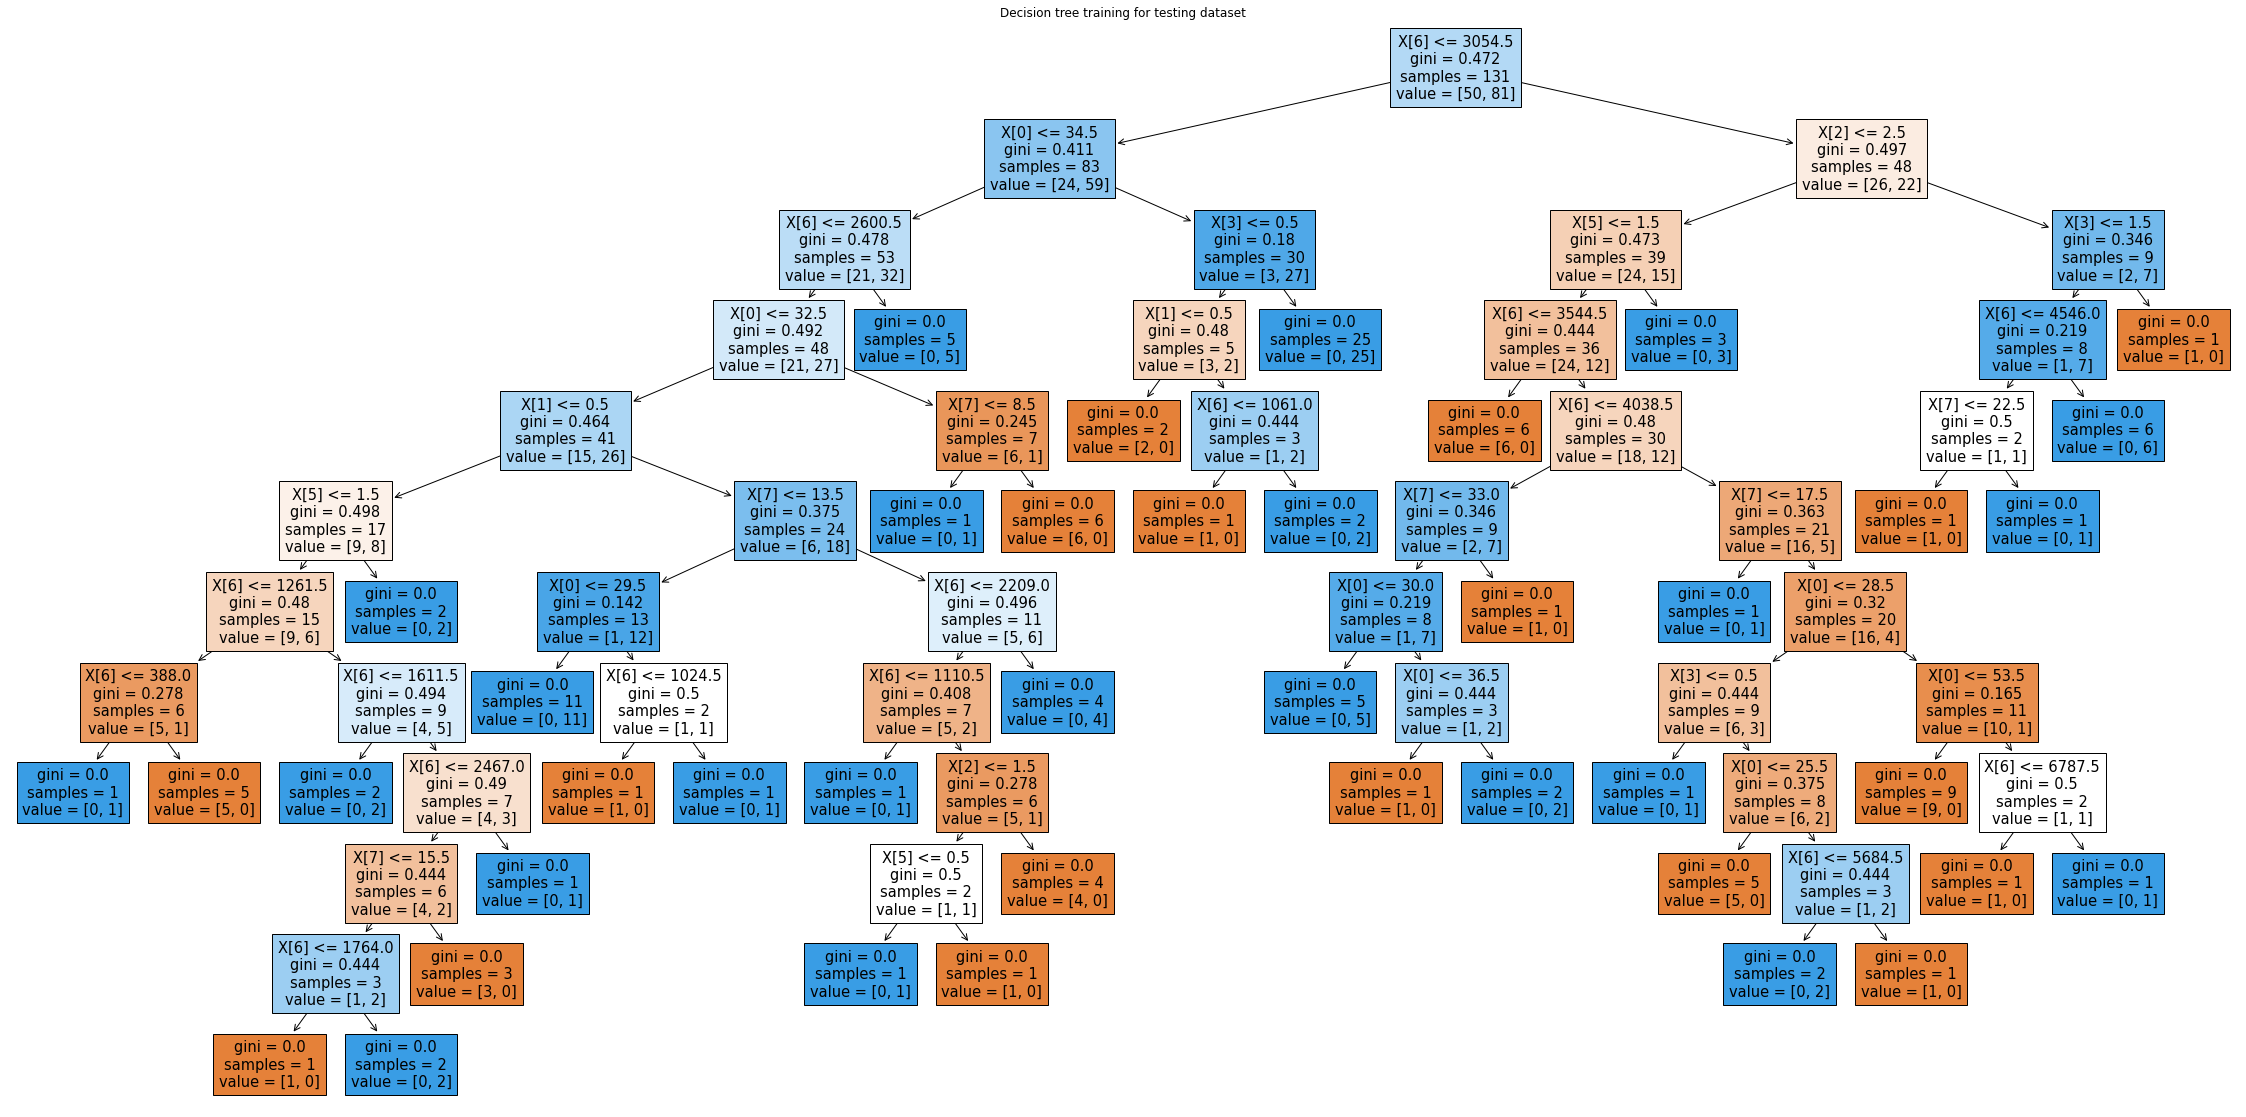

In [ ]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(x_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [ ]:
# importing the tree
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6 <= 3054.50
|   |--- feature_0 <= 34.50
|   |   |--- feature_6 <= 2600.50
|   |   |   |--- feature_0 <= 32.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |--- feature_6 <= 1261.50
|   |   |   |   |   |   |   |--- feature_6 <= 388.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  388.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  1261.50
|   |   |   |   |   |   |   |--- feature_6 <= 1611.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  1611.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 2467.00
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 15.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 1764.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  1764.00
|   |   |   |   |   |   |   |   | 

In [ ]:
# Confusion Matrix

In [ ]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

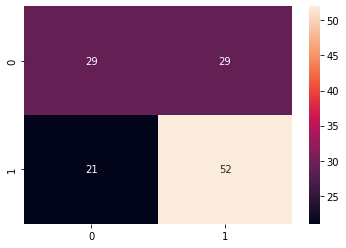

In [ ]:
# providing the inputs for the scalling purpose
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred= classifer.predict(X_test)

# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

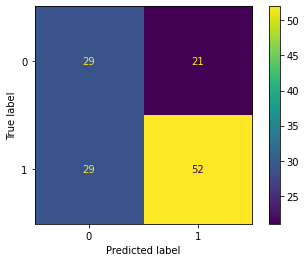

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,y_pred)

0.7123287671232876

In [ ]:
recall_score(y_test,y_pred)

0.6419753086419753

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6183206106870229

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

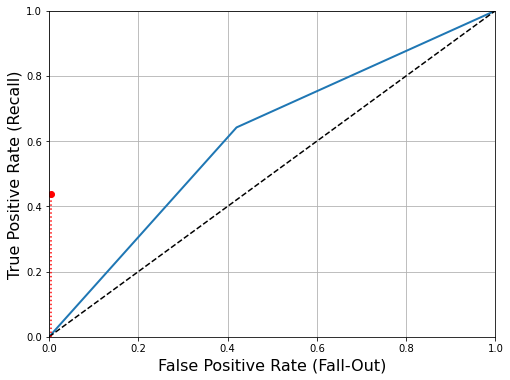

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [ ]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6109876543209877

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as lrcv
from sklearn.metrics import roc_auc_score

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy: 0.634 (0.071)
0.63 accuracy with a standard deviation of 0.07



Depth & leaf nodes =  2
accuracy of Decision Tree =  0.6183206106870229
ROC of Decision Tree =  0.6109876543209877

Depth & leaf nodes =  3
accuracy of Decision Tree =  0.6183206106870229
ROC of Decision Tree =  0.6109876543209877

Depth & leaf nodes =  4
accuracy of Decision Tree =  0.6183206106870229
ROC of Decision Tree =  0.6109876543209877

Depth & leaf nodes =  5
accuracy of Decision Tree =  0.6183206106870229
ROC of Decision Tree =  0.6109876543209877

Depth & leaf nodes =  6
accuracy of Decision Tree =  0.6183206106870229
ROC of Decision Tree =  0.6109876543209877

Depth & leaf nodes =  7
accuracy of Decision Tree =  0.6183206106870229
ROC of Decision Tree =  0.6109876543209877


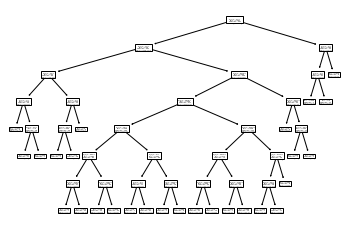

In [ ]:
for i in range(2, 8):
    tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=i, splitter="best", random_state=42)
    tree_clf.fit(x_train, y_train)
    plot_tree(tree_clf);
    print("")
    res_pred = tree_clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Depth & leaf nodes = ", i)
    print("accuracy of Decision Tree = ",accuracy)
    #Precision, recall, f1-score
    #print(cm.classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC of Decision Tree = ",roc_auc)

In [ ]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
res_pred = tree_clf.predict(nX_test)
accuracy_score(ny_test, res_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5508474576271186

In [ ]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_train, y_train, test_size=0.60, random_state=42)
res_pred = tree_clf.predict(nX_test)
accuracy_score(ny_test, res_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5404255319148936

In [ ]:
x_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
123,63,1,2,0,0,2,781,10
521,24,0,2,1,0,0,3190,18
825,30,1,2,1,0,0,1602,21
708,25,0,2,1,0,1,1206,9
989,48,1,1,1,0,1,1743,24


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])

In [ ]:
predict = model.predict(x_test)
predict

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
test_score = model.score(x_test, y_test)
print("MultinomialNB Score:", test_score)

MultinomialNB Score: 0.6717557251908397


In [ ]:
train_score = model.score(x_train, y_train)
print("MultinomialNB Score:",train_score)

MultinomialNB Score: 0.5601023017902813


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'fit_time': array([0.003057  , 0.00300169, 0.00188708, 0.0018723 , 0.00175285]),
 'score_time': array([0.00242281, 0.00113153, 0.00106359, 0.00102067, 0.00124931]),
 'test_score': array([0.46835443, 0.61538462, 0.57692308, 0.6025641 , 0.55128205])}

In [ ]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,25,25
1,18,63


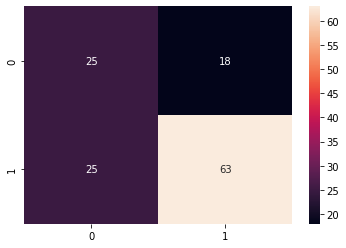

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Conffusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

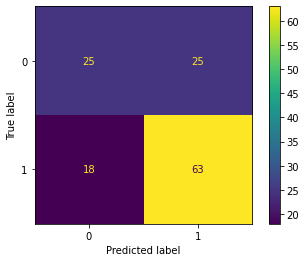

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.7159090909090909

In [ ]:
recall_score(y_test,predict)


0.7777777777777778

In [ ]:
f1_score(y_test,predict)

0.7455621301775148

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6717557251908397

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

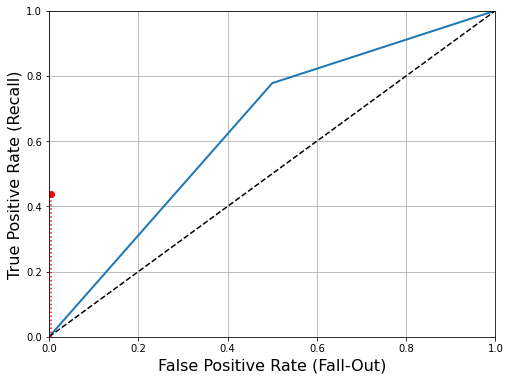

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

## GAUSIAN NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
predict = model.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
test_score = model.score(x_test, y_test)
print("GaussianNB Score:", test_score)

GaussianNB Score: 0.549618320610687


In [ ]:
train_score = model.score(x_train, y_train)
print("GaussianNB Score:",train_score)

GaussianNB Score: 0.6572890025575447


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

{'fit_time': array([0.00984073, 0.00666523, 0.00400138, 0.01088119, 0.03057361]),
 'score_time': array([0.00303745, 0.00288892, 0.00258183, 0.00294805, 0.00309396]),
 'test_score': array([0.53164557, 0.62820513, 0.71794872, 0.73076923, 0.57692308])}

In [ ]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,22,36
1,23,50


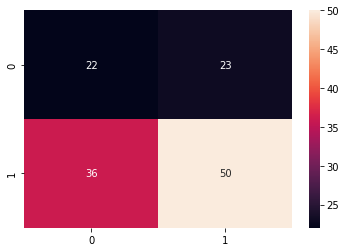

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

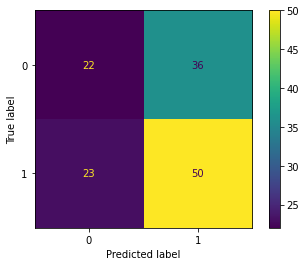

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.5813953488372093

In [ ]:
recall_score(y_test,predict)

0.684931506849315

In [ ]:
f1_score(y_test,predict)

0.6289308176100629

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.549618320610687

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

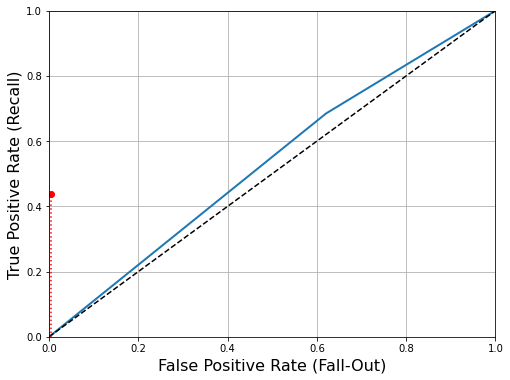

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [ ]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.6388888888888888

## Complement Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train, y_train)

ComplementNB()

In [ ]:
predict = model.predict(x_test)
predict

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
test_score = model.score(x_test, y_test)
print("Complement_NB", test_score)

Complement_NB 0.5190839694656488


In [ ]:
train_score = model.score(x_train, y_train)
print("Complement_NB:",train_score)

Complement_NB: 0.5959079283887468


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

{'fit_time': array([0.0135355 , 0.00413132, 0.0114491 , 0.01154065, 0.00442457]),
 'score_time': array([0.00597262, 0.00244331, 0.00278854, 0.01026249, 0.00843716]),
 'test_score': array([0.59493671, 0.6025641 , 0.64102564, 0.58974359, 0.55128205])}

In [ ]:

conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,20,38
1,25,48


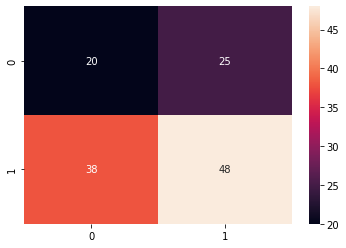

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

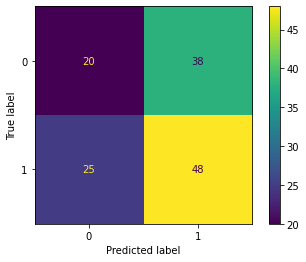

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.5581395348837209

In [ ]:
recall_score(y_test,predict)

0.6575342465753424

In [ ]:
f1_score(y_test,predict)

0.6037735849056604

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.5190839694656488

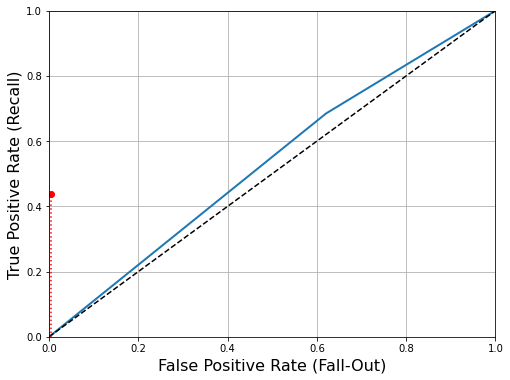

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [ ]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.6388888888888888

## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


BernoulliNB(alpha=0.0, class_prior=[0.4, 0.6])

In [ ]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
test_score = model.score(x_test, y_test)
print("Bernouli_score:", test_score)

Bernouli_score: 0.5267175572519084


In [ ]:
train_score = model.score(x_train, y_train)
print("Bernouli_score:",train_score)

Bernouli_score: 0.5856777493606138


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'fit_time': array([0.00906825, 0.00425982, 0.00433493, 0.00481582, 0.00552177]),
 'score_time': array([0.00278497, 0.00271654, 0.00241542, 0.00271297, 0.0027256 ]),
 'test_score': array([0.48101266, 0.55128205, 0.62820513, 0.58974359, 0.57692308])}

In [ ]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,5,53
1,9,64


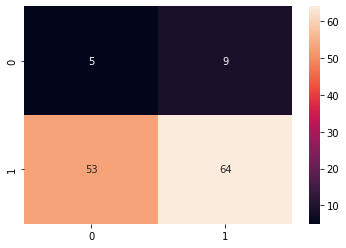

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

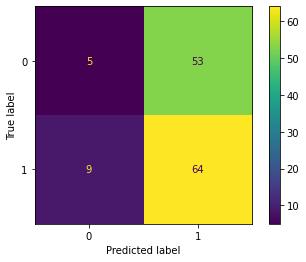

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.5470085470085471

In [ ]:
recall_score(y_test,predict)

0.8767123287671232

In [ ]:
f1_score(y_test,predict)

0.6736842105263159

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.5267175572519084

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

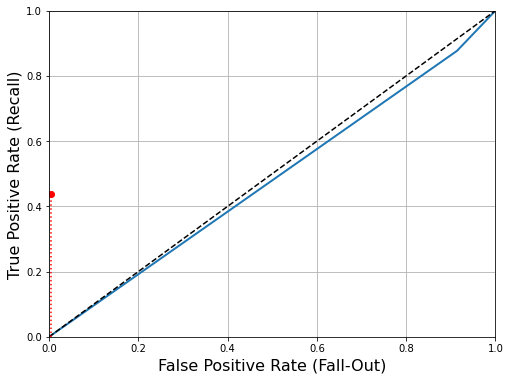

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [ ]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.4814596126594237

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB(alpha=1)
model.fit(x_train, y_train)


CategoricalNB(alpha=1)

In [ ]:
x_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
499,28,1,2,1,1,2,1323,6
626,41,1,2,1,0,2,2116,6
88,30,1,3,1,1,0,2249,18
87,47,1,2,0,1,1,12612,36
387,40,1,3,1,0,1,7374,18
...,...,...,...,...,...,...,...,...
617,37,1,2,2,0,0,3676,6
173,33,1,2,1,0,1,1414,8
936,28,0,1,1,0,2,745,9
342,25,1,2,2,2,1,3213,18


In [ ]:
predict = model.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
test_score = model.score(x_test, y_test)
print("CatagoricalNB_score:", test_score)


CatagoricalNB_score: 0.5190839694656488


In [ ]:
train_score = model.score(x_train, y_train)
print("CatagoricalNB_score:",train_score)

CatagoricalNB_score: 0.8823529411764706


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 83, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 1461, in _joint_log_likelihood
    jll += self.feature_log_prob_[i][:, indices].T
Index

{'fit_time': array([0.00620389, 0.00748563, 0.00703025, 0.01497245, 0.00568914]),
 'score_time': array([0.00581717, 0.00284863, 0.0208118 , 0.00338006, 0.00321627]),
 'test_score': array([       nan, 0.6025641 , 0.69230769,        nan,        nan])}

In [ ]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,28,30
1,33,40


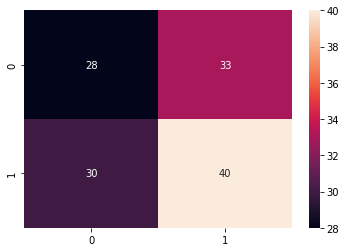

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

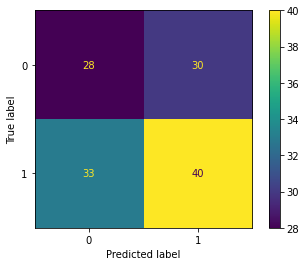

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.5714285714285714

In [ ]:
recall_score(y_test,predict)

0.547945205479452

In [ ]:
f1_score(y_test,predict)

0.5594405594405595

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.5190839694656488

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

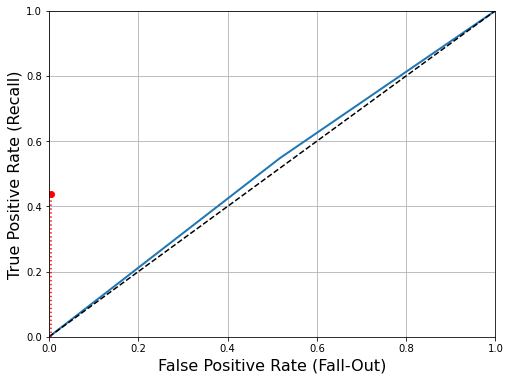

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [ ]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.6388888888888888

#LAB 9



## Logistic Regression

In [ ]:
classifier = lrcv

In [ ]:
xtrain = data1.drop(['Risk'], axis = 1)
xtrain.head()
ytrain = data1['Risk']
ytrain.head()
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [ ]:
x_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
936,28,0,1,1,0,2,745,9
811,28,1,1,1,0,1,484,6
29,63,1,2,1,0,0,6836,60
362,36,0,2,1,0,2,2247,12
341,26,0,1,2,0,0,3599,21


In [ ]:
model = lrcv(C=1000000.)
model = model.fit(x_train,y_train)

In [ ]:
print('coef', model.coef_)
print('intercept', model.intercept_)

coef [[ 7.35642810e-03  1.44352773e-01  8.38370718e-02  1.19805434e-01
   3.24946133e-01  4.27730786e-01  3.31320716e-06 -4.52382103e-02]]
intercept [0.10516113]


In [ ]:
zipped = list(zip(x_train,y_train))

In [ ]:
df = pd.DataFrame(zipped,columns = [features_col ,'Risk'])

In [ ]:
from patsy import dmatrices
y_train, x_train = dmatrices('Risk ~ features_col',
                  df, return_type="dataframe")

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


In [ ]:
print(x_train)

   Intercept  features_col[T.Checking account]  features_col[T.Credit amount]  \
0        1.0                               0.0                            0.0   
1        1.0                               0.0                            0.0   
2        1.0                               0.0                            0.0   
3        1.0                               0.0                            0.0   
4        1.0                               0.0                            0.0   
5        1.0                               1.0                            0.0   
6        1.0                               0.0                            1.0   
7        1.0                               0.0                            0.0   

   features_col[T.Duration]  features_col[T.Housing]  features_col[T.Job]  \
0                       0.0                      0.0                  0.0   
1                       0.0                      0.0                  0.0   
2                       0.0            

In [ ]:
y_train = np.ravel(y_train)

In [ ]:
model = lrcv(C=100000, fit_intercept=False)
model = model.fit(x_train,y_train)
print(pd.DataFrame(np.transpose(model.coef_),x_train.columns))

                                          0
Intercept                         -7.207646
features_col[T.Checking account]  15.948110
features_col[T.Credit amount]     -7.487158
features_col[T.Duration]          -7.487158
features_col[T.Housing]           15.948110
features_col[T.Job]               -7.487158
features_col[T.Saving accounts]   15.948110
features_col[T.Sex]               15.948110


In [ ]:
model.predict_proba(x_train)#Evaluate the Model

array([[9.99259649e-01, 7.40350834e-04],
       [1.59954075e-04, 9.99840046e-01],
       [9.99999585e-01, 4.15075997e-07],
       [1.59954075e-04, 9.99840046e-01],
       [1.59954075e-04, 9.99840046e-01],
       [1.59954075e-04, 9.99840046e-01],
       [9.99999585e-01, 4.15075997e-07],
       [9.99999585e-01, 4.15075997e-07]])

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
xtrain = data1.drop(['Risk'], axis = 1)
xtrain.head()
ytrain = data1['Risk']
ytrain.head()
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.1434704283938919


In [ ]:
print(f"intercept: {model.intercept_}")


intercept: 0.542521807613989


In [ ]:
print(f"slope: {model.coef_}")

slope: [ 3.04405065e-03  8.60477073e-02 -9.49128866e-03  1.17814658e-02
  7.14629143e-02  1.16787809e-01 -5.02364997e-06 -1.07969693e-02]


In [ ]:
y_pred = model.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.61953651 0.61613279 0.69132896 0.53604074 0.42984729 0.33849426
 0.63150177 0.17620427 0.70725902 0.35074396 0.56309795 0.53061707
 0.49941146 0.74966634 0.19955402 0.37048252 0.75730736 0.53575484
 0.37045346 0.57008071 0.48732033 0.50001712 0.66955088 0.24154715
 0.73530256 0.68058422 0.57810546 0.29461911 0.33669812 0.69670399
 0.48496034 0.55874564 0.3272601  0.44139466 0.50559014 0.94882243
 0.78221774 0.55507317 0.4226796  0.86998446 0.67124518 0.57680076
 0.35496857 0.64266959 0.36090831 0.3263681  0.68388203 0.53631333
 0.3904558  0.56670501 0.38419899 0.40339451 0.66652047 0.70560332
 0.47197922 0.17145108 0.64541454 0.67925845 0.28111935 0.97273606
 0.51943369 0.71286587 0.41116312 0.59251535 0.17481801 0.4985022
 0.68480258 0.65734264 0.19008369 0.74755406 0.17272404 0.38301631
 0.42540617 0.60670895 0.72636933 0.17069266 0.3566121  0.56687653
 0.6808443  0.50543952 0.96868175 0.53932718 0.55767805 0.64910518
 0.62832962 0.40138951 0.92344177 0.4114119

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.052)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


In [ ]:

# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [ ]:

# grid search learning rate for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.001}
>0.853 with: {'eta0': 0.01}
>0.847 with: {'eta0': 0.1}
>0.847 with: {'eta0': 1.0}


In [ ]:
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]

In [ ]:
model = Perceptron(eta0=0.0001)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'max_iter': 10}
>0.850 with: {'max_iter': 1}
>0.857 with: {'max_iter': 10}
>0.857 with: {'max_iter': 100}
>0.857 with: {'max_iter': 1000}
>0.857 with: {'max_iter': 10000}


In [ ]:
 #Import the library for MLP
 from sklearn import datasets
 from sklearn import metrics
 from sklearn.neural_network import MLPClassifier
 from sklearn.neural_network import MLPRegressor
 from sklearn.model_selection import train_test_split
 import matplotlib.pyplot as plt
 import seaborn as sns

 plt.style.use('ggplot')

In [ ]:
 #Setting up the Data for Classifier
 dataset = datasets.load_wine()
 X = dataset.data; y = dataset.target
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#Using MLP Classifier and calculating the scores  
model = MLPClassifier()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPClassifier()


In [ ]:
 #Now We are calcutaing other scores for the model using classification_report and confusion matrix by passing expected and predicted values of target of test set.
 print(metrics.classification_report(expected_y, predicted_y))
 print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        16
           1       0.00      0.00      0.00        25
           2       0.40      0.46      0.43        13

    accuracy                           0.41        54
   macro avg       0.27      0.49      0.34        54
weighted avg       0.22      0.41      0.28        54

[[16  0  0]
 [16  0  9]
 [ 7  0  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Setting up the Data for Regressor
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Using MLP Regressor and calculating the scores
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPRegressor()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#Using MLP Regressor and calculating the scores
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPRegressor()


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#Now We are calcutaing other scores for the model using r_2 score and mean_squared_log_error by passing expected and predicted values of target of test set.
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.3897317630235123
0.07864102695717007


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


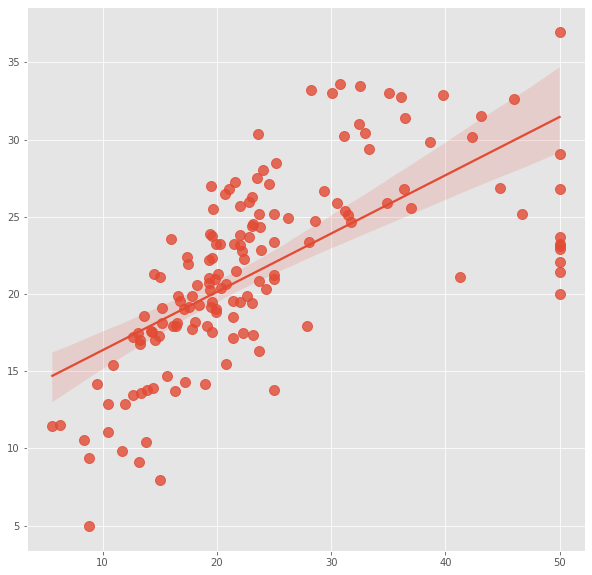

In [ ]:
 #Ploting the model
 plt.figure(figsize=(10,10))
 sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
#Evaluation of the model
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(100,), learning_rate='constant',
  learning_rate_init=0.001, max_iter=200, momentum=0.9,n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,random_state=None, shuffle=True, solver='adam', tol=0.0001,validation_fraction=0.1, verbose=False, warm_start=False)

MLPClassifier()

In [ ]:
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
beta_2=0.999, early_stopping=False, epsilon=1e-08,
hidden_layer_sizes=(100,), learning_rate='constant',
learning_rate_init=0.001, max_iter=200, momentum=0.9,
n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
random_state=None, shuffle=True, solver='adam', tol=0.0001,
validation_fraction=0.1, verbose=False, warm_start=False)


MLPRegressor()